# **Example 2.5.1 (Comparison between GD and Adam)**

## Getting the libraries

In [1]:
import numpy as np
import numpy.matlib as matlib
import math
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

## Simulated cost function

 In the next cell we define a function with several minima often used to demonstrate optimization. This is the so-called Beale function, whose equation is

 $$f(x_1,x_2)= (1.5-x_1+x_1 x_2)^2+(2.25-x_1+x_2 x_2^2)^2+(2.2625-x_1+x_1 x_2^3)^2$$

In [2]:
#define cost function f(x)
#For simplicity, here the variables are x,y instead of x_1, x_2
def beale(X,Y):
    f = (1.5-X+X*Y)**2+(2.25-X+X*Y**2)**2+(2.2625-X+X*Y**3)**2
    dx= 2*(1.5-X+X*Y)*(-1+Y)   +2*(2.25-X+X*Y**2)*(-1+Y**2)  +2*(2.2625-X+X*Y**3)*(-1+Y**3)
    dy= 2*(1.5-X+X*Y)*X   +2*(2.25-X+X*Y**2)*(2*X*Y)  +2*(2.2625-X+X*Y**3)*(3*X*Y**2)
    return f, dx, dy


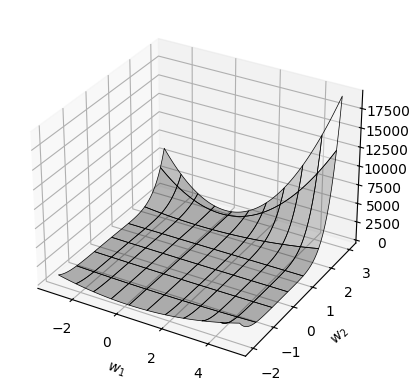

In [3]:
# Define the representation range for both dimensions
y=np.arange(-2,3.1,0.1)
x=np.arange(-3,5.1,0.1)
# Creat two arrays representing ponts in the space of 2 dimensions
X=np.tile(x,(y.size,1))
Y=np.tile(y,(x.size,1)).T

#Compute the value of the function in the interval
Z,dx,dy=beale(X,Y)
ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='black', lw=0.5, rstride=8, cstride=8,
                alpha=0.3,cmap="gray")
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.show()

T=100 #Number of iterations
w_init=np.array([1.2,2]).reshape(1,2) #This is the initial value of the weights

# Initial parameters for the gradient descent
W_S=np.array([0,0]).reshape(1,2)
w_S=w_init
zz_S=np.array([])
mu=0.01


# Gradient descent
for i in np.arange(T):
  z,dx,dy=beale(w_S[0,0],w_S[0,1]) # Value of the cost function and its gradient
  W_S=np.append(W_S,w_S,axis=0)    # Store the present value of the weights in
  w_S=w_S-mu*np.array([dx,dy])     # Gradient descent
  zz_S=np.append(zz_S,z)           # Store the present value of the cost function


# Initial parameters for the Adam optimization
mu=0.3
beta_1=0.9
beta_2=0.999
epsilon=10e-8
W_A=np.array([0,0]).reshape(1,2)
w_A=w_init
zz_A=np.array([])
v=0
g=0


for i in np.arange(1,T):
  z,dx,dy=beale(w_A[0,0],w_A[0,1]) # Value of the cost function and its gradient
  W_A=np.append(W_A,w_A,axis=0)    # Store the present value of the weights
  d=np.array([dx,dy])              # Gradient computation
  d2=np.array([dx,dy])**2          # Squared gradient
  v=beta_1*v+(1-beta_1)*d          # Computation of the values of the Adam function
  g=beta_2*g+(1-beta_2)*d2
  v_=v/(1-beta_1**(i))
  g_=g/(1-beta_2**(i))

  w_A=w_A-mu*v_/(np.sqrt(g_) + epsilon) # Optimization step
  zz_A=np.append(zz_A,z)                # Store the presnt value of the cost function





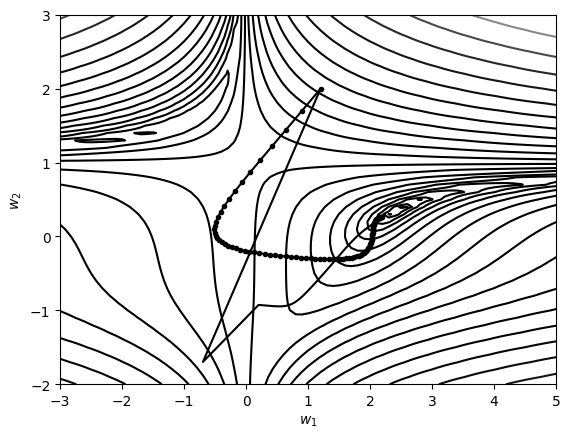

In [4]:
# Plot the contour surface of the cost function and the trajectories of the weights

levels = np.logspace(-9, np.log10(np.max(Z)),50, endpoint=True)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,levels,cmap='gray')
plt.plot(W_S[1:,0],W_S[1:,1],color='k')
plt.plot(W_A[1:,0],W_A[1:,1],color='k',marker='.')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.show()


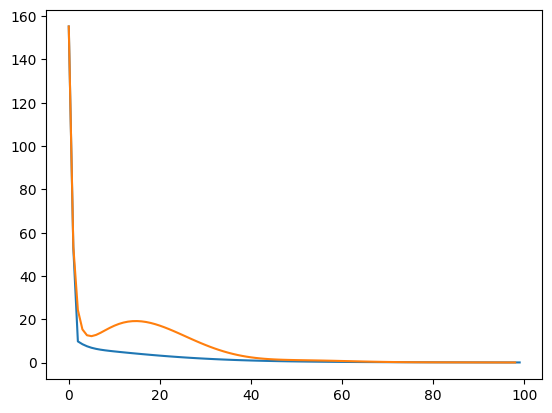

In [5]:
# Plot the evolution of the cost function with both algorithms
plt.plot(zz_S)
plt.plot(zz_A)
plt.show()